In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_administrative_divisions_of_Taiwan')[0]
data

,ISO,HRCIS,Flag,English name,Chinese name,Type,Population 2020[a],Area (km2),Population density (/km2),Population 2010[b],Population change[c],Subdivision count,Largest subdivision
0,.mw-parser-output .monospaced{font-family:mono...,65000,NaN,New Taipei City,新北市,Special municipality,4023620,2052.57,1960.29,3897367,"+126,253",29,Banqiao District
1,TPE,63000,NaN,Taipei City,臺北市,Special municipality,2635286,271.80,9695.69,2618772,"+16,514",12,Daan District
2,TAO,68000,NaN,Taoyuan City,桃園市,Special municipality,2254363,1220.95,1846.39,2002060,"+252,303",13,Taoyuan District
3,TXG,66000,NaN,Taichung City,臺中市,Special municipality,2816667,2214.90,1271.69,2648419,"+168,248",29,Beitun District
4,TNN,67000,NaN,Tainan City,臺南市,Special municipality,1879115,2191.65,857.40,1873794,"+5,321",37,Yongkang District
5,KHH,64000,NaN,Kaohsiung City,高雄市,Special municipality,2773984,2951.85,939.74,2773483,+501,38,Fongshan District
6,ILA,10002,NaN,Yilan County,宜蘭縣,County,453951,2143.63,211.77,460486,"–6,535",12,Yilan City
7,HSQ,10004,NaN,Hsinchu County,新竹縣,County,565272,1427.54,395.98,513015,"+52,257",13,Zhubei City
8,MIA,10005,NaN,Miaoli County,苗栗縣,County,544762,1820.31,299.27,560968,"–16,206",18,Toufen City
9,CHA,10007,NaN,Changhua County,彰化縣,County,1271015,1074.40,1183.00,1307286,"–36,271",26,Changhua City


In [3]:
for population_data in data:
    print(population_data)

ISO
HRCIS
Flag
English name
Chinese name
Type
Population 2020[a]
Area (km2)
Population density (/km2)
Population 2010[b]
Population change[c]
Subdivision count
Largest subdivision


In [4]:
population_data = data[['English name','Type','Population 2020[a]']]

In [5]:
population_data.rename(columns = {'English name' : 'District'}, inplace = True)
population_data['Districts2'] = ""

C:\Users\Anson CH Huang\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\Anson CH Huang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
population_data

,District,Type,Population 2020[a],Districts2
0,New Taipei City,Special municipality,4023620,
1,Taipei City,Special municipality,2635286,
2,Taoyuan City,Special municipality,2254363,
3,Taichung City,Special municipality,2816667,
4,Tainan City,Special municipality,1879115,
5,Kaohsiung City,Special municipality,2773984,
6,Yilan County,County,453951,
7,Hsinchu County,County,565272,
8,Miaoli County,County,544762,
9,Changhua County,County,1271015,


In [7]:
for index, row in population_data.iterrows():
    if '[' and ']' in row['District']:
        start_index = row['District'].find('[')
        end_index = row['District'].find(']')
        population_data.loc[index, 'Districts2'] = population_data.loc[index]['District'][start_index+1: end_index]
        
    else:
        population_data.loc[index, 'Districts2'] = population_data.loc[index]['District']

C:\Users\Anson CH Huang\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
population_data

,District,Type,Population 2020[a],Districts2
0,New Taipei City,Special municipality,4023620,New Taipei City
1,Taipei City,Special municipality,2635286,Taipei City
2,Taoyuan City,Special municipality,2254363,Taoyuan City
3,Taichung City,Special municipality,2816667,Taichung City
4,Tainan City,Special municipality,1879115,Tainan City
5,Kaohsiung City,Special municipality,2773984,Kaohsiung City
6,Yilan County,County,453951,Yilan County
7,Hsinchu County,County,565272,Hsinchu County
8,Miaoli County,County,544762,Miaoli County
9,Changhua County,County,1271015,Changhua County


In [9]:
nep_districts = gpd.read_file(r'TWN_adm/TWN_adm2.shp')
nep_districts

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,225,TWN,Taiwan,1,Kaohsiung,1,Kaohsiung City,Chuan-shih,Special Municipality,None,Gaoxiong Shi,"MULTIPOLYGON (((120.23904 22.75155, 120.23875 ..."
1,225,TWN,Taiwan,2,Pratas Islands,2,None,None,None,None,None,"POLYGON ((116.71722 20.70959, 116.71778 20.709..."
2,225,TWN,Taiwan,3,Taipei,3,Taipei City,Chuan-shih,Special Municipality,None,Taibei Shi,"POLYGON ((121.52582 24.95191, 121.45911 24.930..."
3,225,TWN,Taiwan,4,Taiwan,4,Changhwa,District|Hsien,County,None,Zhanghua|Changhua,"MULTIPOLYGON (((120.46427 24.16347, 120.46403 ..."
4,225,TWN,Taiwan,4,Taiwan,5,Chiayi,District|Hsien,County,None,Jiayi|Chiai,"MULTIPOLYGON (((120.13403 23.37264, 120.13403 ..."
5,225,TWN,Taiwan,4,Taiwan,6,Hsinchu,District|Hsien,County,None,Xinzhu,"MULTIPOLYGON (((121.25690 24.36170, 121.22860 ..."
6,225,TWN,Taiwan,4,Taiwan,7,Hualien,District|Hsien,County,None,Hualia,"MULTIPOLYGON (((120.99192 23.47921, 121.06472 ..."
7,225,TWN,Taiwan,4,Taiwan,8,Ilan,District|Hsien,County,None,Yilan,"MULTIPOLYGON (((121.84292 24.47625, 121.84236 ..."
8,225,TWN,Taiwan,4,Taiwan,9,Kaohsiung,District|Hsien,County,None,Gaoxiong,"MULTIPOLYGON (((120.33847 22.55153, 120.33847 ..."
9,225,TWN,Taiwan,4,Taiwan,10,Keelung City,Shi,Municipality,None,Jilong Shi|Chilung City,"MULTIPOLYGON (((121.78680 25.19514, 121.78680 ..."


In [10]:
nep_districts = nep_districts[['NAME_2', 'geometry']]
nep_districts.rename(columns = {'NAME_2' : 'District'}, inplace = True)

In [11]:
nep_districts

,District,geometry
0,Kaohsiung City,"MULTIPOLYGON (((120.23904 22.75155, 120.23875 ..."
1,None,"POLYGON ((116.71722 20.70959, 116.71778 20.709..."
2,Taipei City,"POLYGON ((121.52582 24.95191, 121.45911 24.930..."
3,Changhwa,"MULTIPOLYGON (((120.46427 24.16347, 120.46403 ..."
4,Chiayi,"MULTIPOLYGON (((120.13403 23.37264, 120.13403 ..."
5,Hsinchu,"MULTIPOLYGON (((121.25690 24.36170, 121.22860 ..."
6,Hualien,"MULTIPOLYGON (((120.99192 23.47921, 121.06472 ..."
7,Ilan,"MULTIPOLYGON (((121.84292 24.47625, 121.84236 ..."
8,Kaohsiung,"MULTIPOLYGON (((120.33847 22.55153, 120.33847 ..."
9,Keelung City,"MULTIPOLYGON (((121.78680 25.19514, 121.78680 ..."


In [12]:
nep_districts.crs

{'init': 'epsg:4326'}

In [13]:
for index, row in nep_districts['District'].iteritems():
    if row in population_data['District'].tolist():
        pass
    else:
        print('The district ', row , ' is NOT in the population_data list')

The district  None  is NOT in the population_data list
The district  Changhwa  is NOT in the population_data list
The district  Chiayi  is NOT in the population_data list
The district  Hsinchu  is NOT in the population_data list
The district  Hualien  is NOT in the population_data list
The district  Ilan  is NOT in the population_data list
The district  Kaohsiung  is NOT in the population_data list
The district  Miaoli  is NOT in the population_data list
The district  Nantou  is NOT in the population_data list
The district  Penghu  is NOT in the population_data list
The district  Pingtung  is NOT in the population_data list
The district  Taichung  is NOT in the population_data list
The district  Tainan  is NOT in the population_data list
The district  Taipei  is NOT in the population_data list
The district  Taitung  is NOT in the population_data list
The district  Taoyuan  is NOT in the population_data list
The district  Yunlin  is NOT in the population_data list


In [14]:
nep_districts.replace('Changhwa', 'Changhua County', inplace = True)
nep_districts.replace('Chiayi', 'Chiayi County', inplace = True)
nep_districts.replace('Hsinchu', 'Hsinchu County', inplace = True)
nep_districts.replace('Hualien', 'Hualien County', inplace = True)
nep_districts.replace('Ilan', 'Yilan County', inplace = True)
nep_districts.replace('Kaohsiung', 'Kaohsiung City', inplace = True)
nep_districts.replace('Keelung City', 'Keelung City', inplace = True)
nep_districts.replace('Miaoli', 'Miaoli County', inplace = True)
nep_districts.replace('Nantou', 'Nantou County', inplace = True)
nep_districts.replace('Penghu', 'Penghu County', inplace = True)
nep_districts.replace('Pingtung', 'Pingtung County', inplace = True)
nep_districts.replace('Taichung', 'Taichung City', inplace = True)
nep_districts.replace('Tainan', 'Tainan City', inplace = True)
nep_districts.replace('Taipei', 'Taipei City', inplace = True)
nep_districts.replace('Taitung', 'Taitung County', inplace = True)
nep_districts.replace('Taoyuan', 'Taoyuan City', inplace = True)
nep_districts.replace('Yunlin', 'Yunlin County', inplace = True)

C:\Users\Anson CH Huang\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [15]:
nep_districts

,District,geometry
0,Kaohsiung City,"(POLYGON ((120.2390365600586 22.7515544891358,..."
1,None,"POLYGON ((116.7172241210938 20.70959472656256,..."
2,Taipei City,"POLYGON ((121.5258178710939 24.95191001892101,..."
3,Changhua County,"(POLYGON ((120.4642715454102 24.1634731292724,..."
4,Chiayi County,(POLYGON ((120.1340255737306 23.37264060974132...
5,Hsinchu County,"(POLYGON ((121.2568969726563 24.3617000579834,..."
6,Hualien County,(POLYGON ((120.9919204711915 23.47921180725092...
7,Yilan County,(POLYGON ((121.8429183959961 24.47624969482428...
8,Kaohsiung City,(POLYGON ((120.3384704589845 22.55152702331554...
9,Keelung City,(POLYGON ((121.7868041992188 25.19513893127447...


In [16]:
population_data

,District,Type,Population 2020[a],Districts2
0,New Taipei City,Special municipality,4023620,New Taipei City
1,Taipei City,Special municipality,2635286,Taipei City
2,Taoyuan City,Special municipality,2254363,Taoyuan City
3,Taichung City,Special municipality,2816667,Taichung City
4,Tainan City,Special municipality,1879115,Tainan City
5,Kaohsiung City,Special municipality,2773984,Kaohsiung City
6,Yilan County,County,453951,Yilan County
7,Hsinchu County,County,565272,Hsinchu County
8,Miaoli County,County,544762,Miaoli County
9,Changhua County,County,1271015,Changhua County


In [21]:
# Create a new column and calculate the areas of the districts 
nep_districts['area'] = nep_districts.area*10000

C:\Users\Anson CH Huang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
nep_districts = nep_districts.merge(population_data, on = 'District')
nep_districts

,District,geometry,area,Type,Population 2020[a],Districts2
0,Kaohsiung City,"MULTIPOLYGON (((120.23904 22.75155, 120.23875 ...",60.171779,Special municipality,2773984,Kaohsiung City
1,Kaohsiung City,"MULTIPOLYGON (((120.33847 22.55153, 120.33847 ...",2658.084843,Special municipality,2773984,Kaohsiung City
2,Taipei City,"POLYGON ((121.52582 24.95191, 121.45911 24.930...",237.923336,Special municipality,2635286,Taipei City
3,Taipei City,"MULTIPOLYGON (((122.07875 25.63431, 122.07875 ...",2044.269632,Special municipality,2635286,Taipei City
4,Changhua County,"MULTIPOLYGON (((120.46427 24.16347, 120.46403 ...",1055.277694,County,1271015,Changhua County
5,Chiayi County,"MULTIPOLYGON (((120.13403 23.37264, 120.13403 ...",1524.890150,County,502007,Chiayi County
6,Hsinchu County,"MULTIPOLYGON (((121.25690 24.36170, 121.22860 ...",1557.450909,County,565272,Hsinchu County
7,Hualien County,"MULTIPOLYGON (((120.99192 23.47921, 121.06472 ...",4157.147255,County,325706,Hualien County
8,Yilan County,"MULTIPOLYGON (((121.84292 24.47625, 121.84236 ...",2295.588529,County,453951,Yilan County
9,Keelung City,"MULTIPOLYGON (((121.78680 25.19514, 121.78680 ...",70.597241,City,371878,Keelung City


In [28]:
nep_districts['pop_den (people/sq. km)'] = nep_districts['Population 2020[a]']/nep_districts['area']

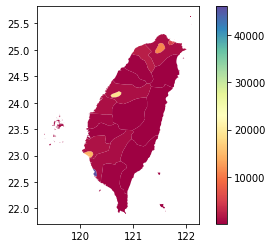

In [29]:
nep_districts.plot(column = 'pop_den (people/sq. km)', cmap = 'Spectral', legend = True)